In [1]:
%config Completer.use_jedi=False

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
df=pd.read_csv('./student-mat.csv')

In [5]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
df.shape

(395, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Data Analysis

Since There are 33 colums in our dataset.To apply Linear Regression we need which features are highly correlated with each other. To do so we will take into consideration the columns having numerical values and then establish correlattion matrix

In [10]:
#all numerical colums in form of a list
numeric_columns=df.loc[:, df.columns != 'G3'].select_dtypes(include=np.number).columns.tolist()

In [11]:
numeric_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2']

<AxesSubplot:>

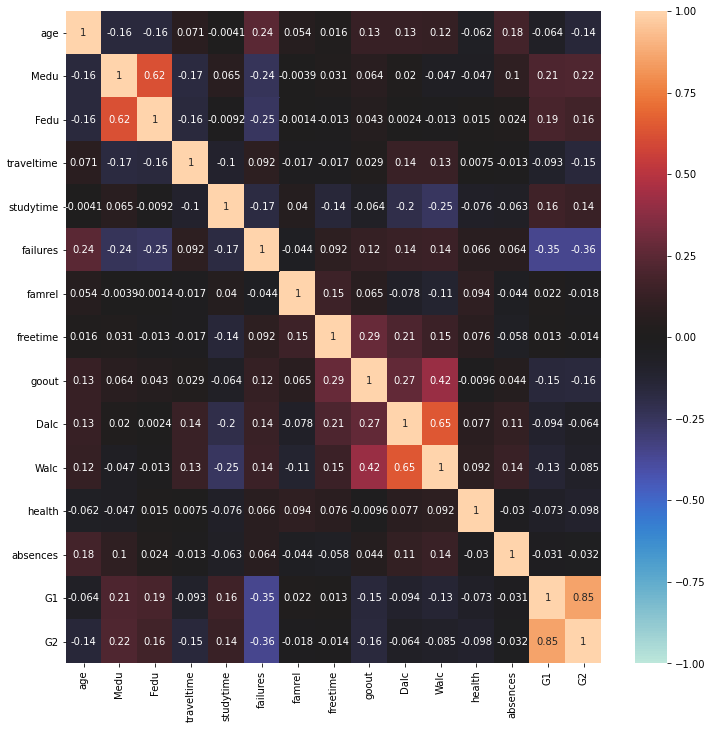

In [12]:
# check correlation between column
correlation_between_columns = df[numeric_columns].corr()
upper_triangle_corr = np.triu(correlation_between_columns)

fig, ax = plt.subplots(figsize=(12,12))
# sns.heatmap(correlation_between_columns, annot = True, cmap="YlGnBu",ax=ax,annot_kws={"size":15},mask=upper_triangle_corr)
sns.heatmap(correlation_between_columns,annot = True, vmin=-1, vmax=1, center= 0)

From the above correlation matrix we can say that "G1" and "G2" are highly correlated with each other. Therefore We will use "G1" and "G2" to train our linear regression model.

In [13]:
#Modifying the dataset for training and testing
final_feature_column = ['G1','G2']
target_column = ['G3']
final_column = final_feature_column+target_column
df = df[final_column]

In [14]:
# Modified Dataset
df.head()

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


In [15]:
df.shape

(395, 3)

In [16]:
# prepare the data to numpy array
final_feature_array = df[final_feature_column].to_numpy()
target_array = df[target_column].to_numpy()

In [17]:
final_feature_array.shape

(395, 2)

In [18]:
target_array.shape

(395, 1)

Since The Dataset is ready We will use the "train-test split" to split our data into train and test sets respectively.
We will use 80% of the data for training and remaining 20% will be available for testing

In [19]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    final_feature_array,
    target_array,
    train_size=0.8,
    random_state=0
    )

In [20]:
# check the shape data
print('Shape Data X Train:')
print(X_train.shape)
print('\nShape Data X Test:')
print(X_test.shape)
print('\nShape Data y Train:')
print(y_train.shape)
print('\nShape Data y Test:')
print(y_test.shape)

Shape Data X Train:
(316, 2)

Shape Data X Test:
(79, 2)

Shape Data y Train:
(316, 1)

Shape Data y Test:
(79, 1)


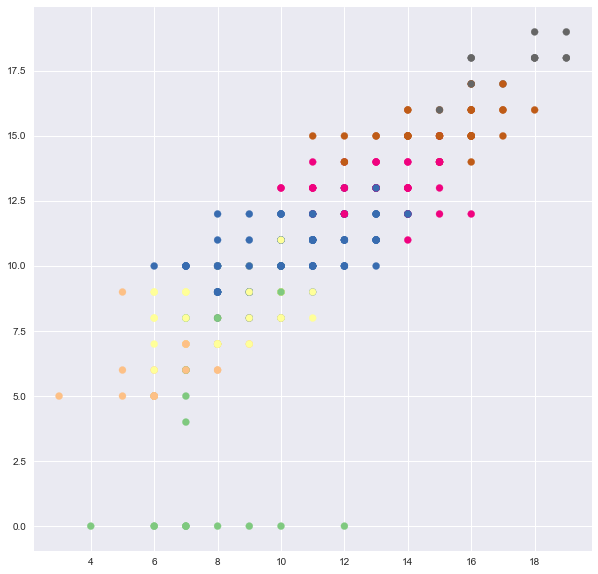

In [21]:
#Plotting the training data
plt.style.use("seaborn")
plt.figure(figsize=(10,10))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.show()

3d Plot of the data to specify that it is a regression data

<IPython.core.display.Javascript object>


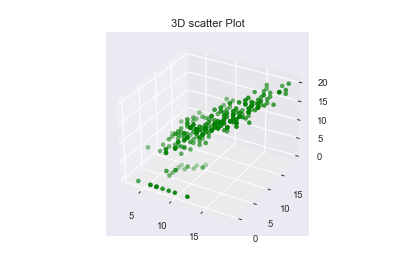

In [36]:

from mpl_toolkits import mplot3d
%matplotlib notebook 

fig=plt.figure()
ax=plt.axes(projection="3d")

# Creating plot
ax.scatter3D(X_train[:,0],X_train[:,1],y_train,color='green')
plt.title("3D scatter Plot")
plt.show()

### Training

In [23]:
model=LinearRegression()

In [24]:
# train the data
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# model result
print('Coefficients:\n',model.coef_)
# print('\n')
print('Intercept:',model.intercept_)

Coefficients:
 [[0.09723061 1.01463373]]
Intercept: [-1.41970044]


In [26]:
# The Output of the training Data
output = model.predict(X_train)
output

array([[ 9.69894293],
       [ 8.48984799],
       [ 7.57244487],
       [ 9.60171232],
       [13.03453594],
       [ 9.79617354],
       [10.81080727],
       [10.81080727],
       [15.16103401],
       [18.39939641],
       [ 7.47521426],
       [ 8.5870786 ],
       [-0.73908617],
       [ 8.68430921],
       [15.25826462],
       [ 6.36334992],
       [ 8.68430921],
       [18.59385763],
       [10.81080727],
       [12.11713283],
       [ 9.79617354],
       [ 9.79617354],
       [13.13176655],
       [ 6.46058053],
       [ 7.28075304],
       [ 5.4459468 ],
       [12.93730533],
       [14.96657279],
       [ 4.23685186],
       [ 6.36334992],
       [ 6.46058053],
       [ 6.36334992],
       [ 9.69894293],
       [15.45272584],
       [ 5.34871619],
       [ 4.23685186],
       [ 6.36334992],
       [ 8.68430921],
       [-0.54462495],
       [ 8.68430921],
       [15.25826462],
       [10.71357666],
       [13.03453594],
       [13.03453594],
       [-0.73908617],
       [10

In [27]:
# evaluate regression model - R squared
print('R^2 score:',model.score(X_train, y_train))

R^2 score: 0.8275554421003004


### Evaluating The Test Data

In [35]:
# evaluate regression model - R squared on test data
print('R^2 score:',model.score(X_test, y_test))

R^2 score: 0.8027243833155605
